Data Overview

The dataset has 891 rows and 12 columns.

Missing values are found in Age (177 missing), Cabin (687 missing), and Embarked (2 missing).

Survived is the target variable (0 = did not survive, 1 = survived).

In [19]:
import pandas as pd

url = "https://raw.githubusercontent.com/SUJJI-1111/titanic-eda/main/train.csv"
titanic = pd.read_csv(url)

print("✅ Dataset loaded successfully!")
print(titanic.shape)
titanic.head()


✅ Dataset loaded successfully!
(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
titanic.info()
titanic.describe()
titanic.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0



Univariate Analysis

Categorical variables

Sex: ~65% male, ~35% female.

Pclass: Most passengers (~55%) traveled in 3rd class, while only ~24% were in 1st class.

Survived: About 38% survived, 62% did not.

In [21]:
titanic['Sex'].value_counts()
titanic['Embarked'].value_counts()
titanic['Survived'].value_counts()


,count
Survived,
0,549
1,342


Numerical features → histograms & boxplots
Numerical variables

Age: Distribution is right-skewed; most passengers are between 20–40 years. There are also children and elderly passengers.

Fare: Highly right-skewed — most fares are under 50, but a few passengers paid over 500.

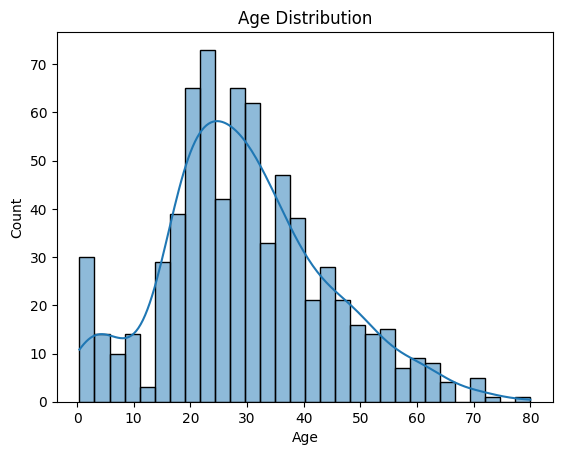

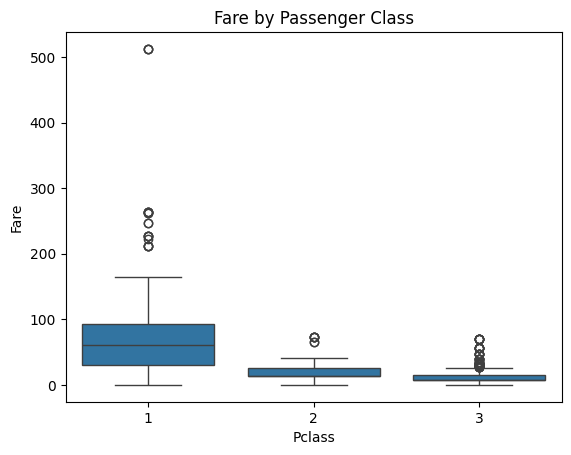

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(titanic['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

sns.boxplot(x='Pclass', y='Fare', data=titanic)
plt.title("Fare by Passenger Class")
plt.show()


### Bivariate Analysis (Survival vs Variables)

- **Sex vs Survival**: Females had a much higher survival rate 74% compared to males 19%.  
- **Pclass vs Survival**: 1st class had the highest survival 63%, while 3rd class had the lowest 24%.  
- **Embarked vs Survival**: Passengers from port C had better survival 55% compared to port S 34%.  
- **Age vs Survival**: Children (<10 years) had higher survival rates than adults.  
- **Fare vs Survival**: Passengers who paid higher fares were more likely to survive, indicating wealth/class advantage.  


Survival vs Categorical variables

<Axes: xlabel='Sex', ylabel='count'>

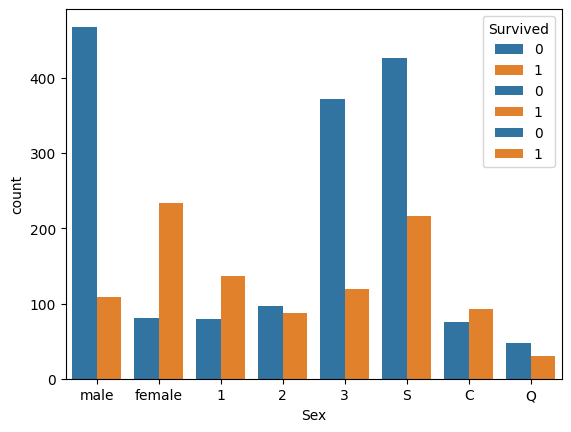

In [23]:
sns.countplot(x='Sex', hue='Survived', data=titanic)
sns.countplot(x='Pclass', hue='Survived', data=titanic)
sns.countplot(x='Embarked', hue='Survived', data=titanic)


Observation: Women had higher survival, 1st class survival > 3rd class.

Survival vs Numerical variables


<Axes: xlabel='Survived', ylabel='Age'>

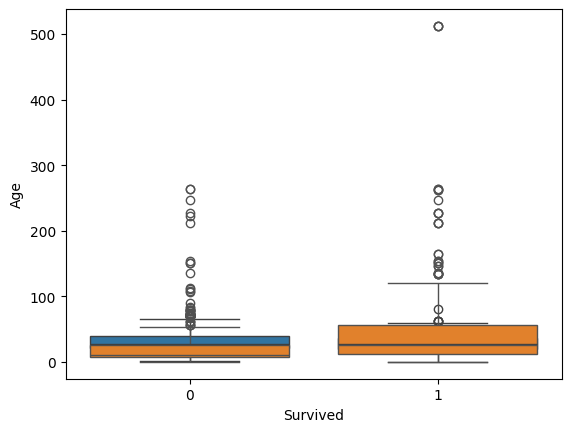

In [24]:
sns.boxplot(x='Survived', y='Age', data=titanic)
sns.boxplot(x='Survived', y='Fare', data=titanic)


Correlation & Relationships

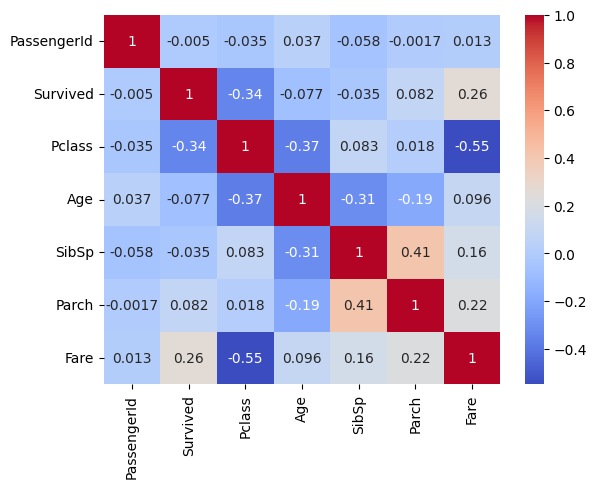

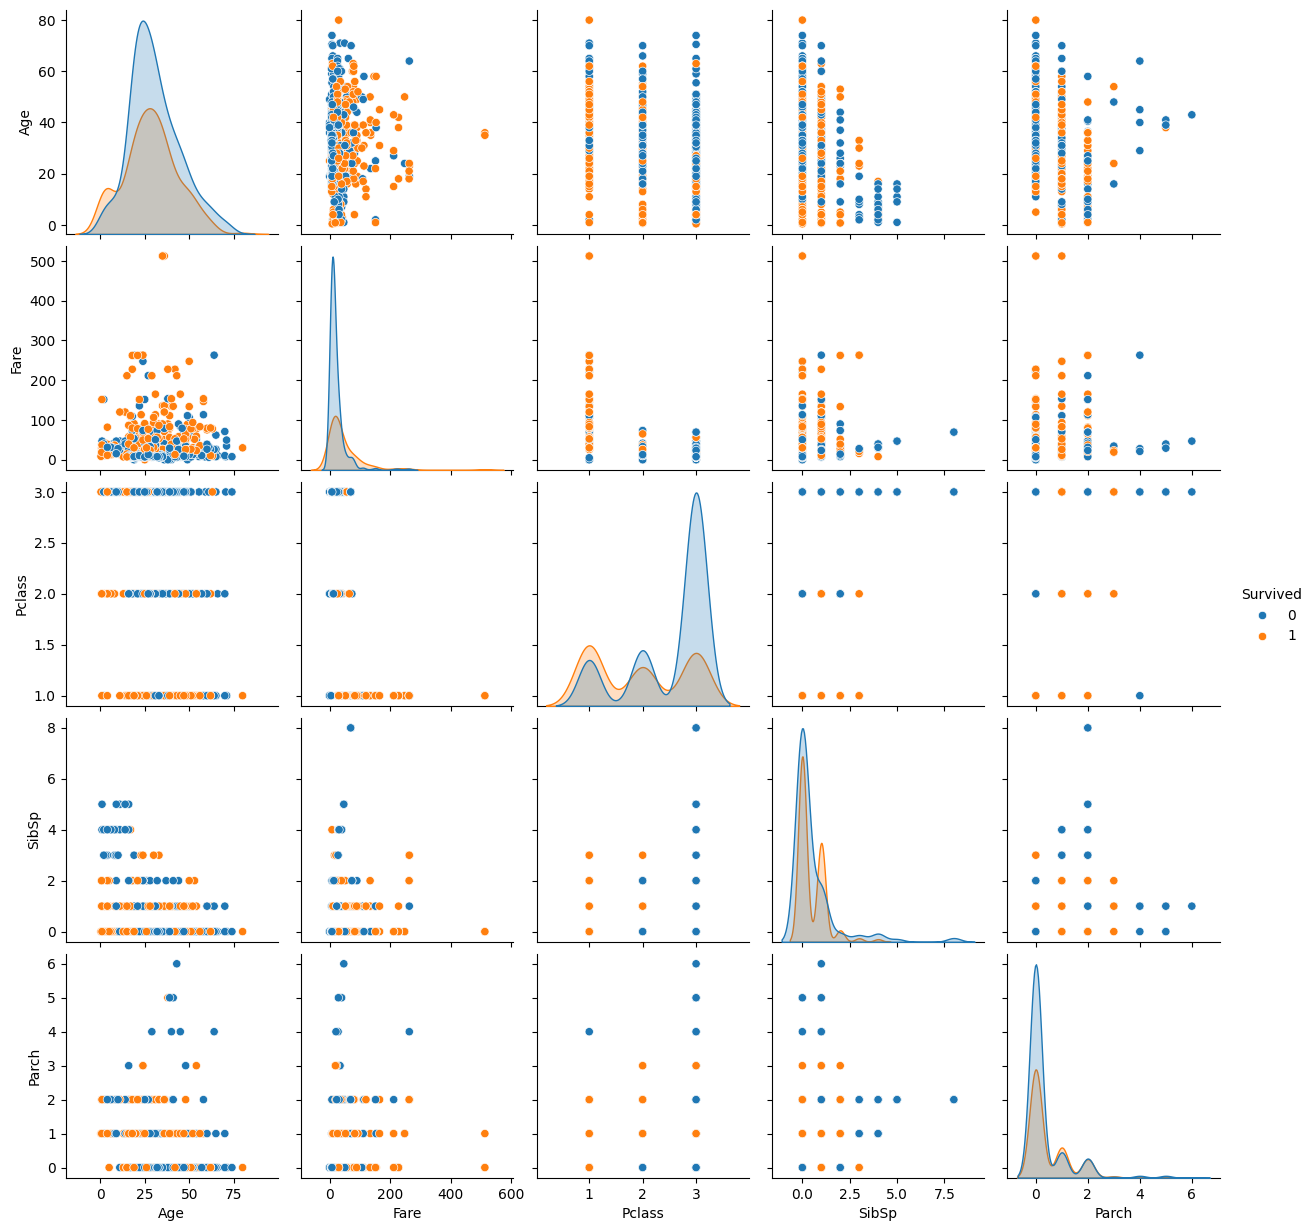

In [25]:
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap="coolwarm")
sns.pairplot(titanic[['Survived','Age','Fare','Pclass','SibSp','Parch']], hue='Survived')


Observation: Fare is positively correlated with survival; higher class had higher fare.

Missing Data Handling

Fill Age with median, drop Cabin, fill Embarked with mode.

In [26]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-2964154243.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
/tmp/ipython-input-2964154243.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Summary of Findings

Gender: Females survived at much higher rates.

Class: 1st class passengers had better survival than 3rd class.

Age: Children had higher survival than adults.

Fare: Higher fares → higher survival (wealthier had better access to lifeboats).

Embarked: Passengers from port C had higher survival compared to S.

## 🔎 Exploratory Data Analysis (Observations)

### 1. Data Overview
- Dataset has 891 rows and 12 columns.  
- Missing values are found in:
  - Age → 177 missing  
  - Cabin → 687 missing  
  - Embarked → 2 missing  
- Target variable is Survived (0 = did not survive, 1 = survived).  

---

### 2. Univariate Analysis
- Sex: About 65% male, 35% female.  
- Pclass: Majority 55% traveled in 3rd class; 1st class 24%.  
- Survived: About 38% survived, 62% did not.  
- Age: Most passengers were between 20–40 years; distribution is right-skewed.  
- Fare: Highly right-skewed; most paid under 50, but a few paid over 500.  

---

### 3. Bivariate Analysis (Survival vs Variables)
- Sex vs Survival: Females had a much higher survival rate 74% compared to males 19%.  
- Pclass vs Survival: 1st class had the highest survival 63%, while 3rd class had the lowest 24%.  
- Embarked vs Survival: Passengers from port C had better survival 55% compared to port S 34%.  
- Age vs Survival: Children under 10 years had higher survival rates than adults.  
- Fare vs Survival: Higher fare passengers were more likely to survive, showing wealth/class advantage.  

---

### 4. Correlation & Relationships
- Fare is positively correlated with Survival.  
- Pclass has a weak negative correlation with Survival (lower class = lower survival).  
- Age shows almost no strong correlation with Survival.  

---

### 5. Key Summary of Findings
- Women, children, and wealthier passengers had higher survival rates.  
- 3rd class male passengers had the lowest survival rates.  
- Port of embarkation influenced outcomes, with best survival from Cherbourg and worst from Southampton.  
- Socio-economic status played a significant role in survival chances.  
